In [1]:
!pip install -q --user hypergbm

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [3]:
df_train= pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
df_test= pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

df_train.shape,df_test.shape

((20758, 18), (13840, 17))

In [4]:
df_train

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [5]:
from hypergbm import make_experiment

### Input Data

,X_train.shape,y_train.shape,X_eval.shape,y_eval.shape,X_test.shape,Task
0,"(20758, 17)","(20758,)",None,None,None,multiclass(7)


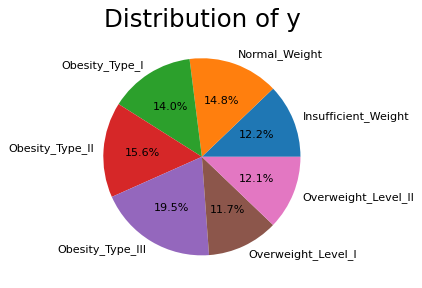

## Data Adaption

### Initliazed parameters

,key,value
0,memory_limit,0.05
1,min_cols,0.3
2,name,data_adaption
3,target,None


### Fitted parameters

,key,value
0,input_features,"[id, Gender, Age, Height, Weight, family_histo..."
1,selected_features,"[id, Gender, Age, Height, Weight, family_histo..."
2,unselected_features,[]


### Elapsed

* 0.011 seconds

## Data Clean

### Initliazed parameters

,key,value
0,cv,True
1,data_cleaner_args,"{'nan_chars': None, 'correct_object_dtype': Tr..."
2,name,data_clean
3,train_test_split_strategy,None


### Fitted parameters

,key,value
0,input_features,"[id, Gender, Age, Height, Weight, family_histo..."
1,selected_features,"[Gender, Age, Height, Weight, family_history_w..."
2,unselected_features,[id]
3,X_train.shape,"(20758, 16)"
4,y_train.shape,"(20758,)"
5,X_eval.shape,None
6,y_eval.shape,None
7,X_test.shape,None
8,unselected_reason,{'id': 'idness'}
9,kept/dropped feature count,16/1


### Elapsed

* 0.197 seconds

## Space Searching

### Initliazed parameters

,key,value
0,cv,True
1,name,space_searching
2,num_folds,3


#### Experiment Settings:

HyperGBM(searcher=EvolutionSearcher(space_fn=GeneralSearchSpaceGenerator(kwargs=None, n_estimators=200), population_size=30, sample_size=10, regularized=True, optimize_direction='max', random_state=RandomState(MT19937) at 0x7D0882678040), callbacks=[EarlyStoppingCallback(max_no_improvement_trials=10, mode='max', time_limit=3599.7899825572968), NotebookCallback(), ProgressiveCallback(), FitCrossValidationCallback()], task='multiclass', discriminator=OncePercentileDiscriminator(percentile=50, history=TrialHistory(direction='max'), optimize_direction='max'))

,X,y,X_eval,y_eval,cv,num_folds,max_trials,fit_kwargs
0,"(20758, 16)","(20758,)",None,None,True,3,30,()


#### Trials Summary:

,Trial No.,Previous reward,Best trial,Best reward,Total elapsed,Valid trials,Max trials
0,15,0.667454,5,[0.9053858753251758],518.823782,15,30


#### Best Trial:

key,value
signature,7d235d739432a9a9efb07afb1f061359
vectors,"[0, 2, 1, 1, 135, 2, 3, 2, 1]"
0-estimator_options.hp_or,0
1-numeric_imputer_0.strategy,constant
2-numeric_or_scaler_0.hp_or,1
3-Module_LightGBMEstimator_1.boosting_type,dart
4-Module_LightGBMEstimator_1.num_leaves,135
5-Module_LightGBMEstimator_1.max_depth,7
6-Module_LightGBMEstimator_1.learning_rate,0.1
7-Module_LightGBMEstimator_1.reg_alpha,0.1


#### Top trials:

,Trial No.,Reward,Elapsed,Space Vector
0,5,[0.9053858753251758],83.954946,"[0, 2, 1, 1, 135, 2, 3, 2, 1]"
1,16,[0.9049041333461798],11.782072,"[0, 1, 0, 0, 385, 2, 3, 2, 0]"
2,13,[0.900857500722613],8.118235,"[1, 0, 5, 2, 2, 3, 0, 1, 1]"
3,6,[0.8967626939011466],81.239601,"[2, 1, 0, 3, 2, 2]"
4,10,[0.8962809519221505],26.784406,"[1, 0, 0, 3, 1, 3, 1, 1, 1]"


search:   0%|          | 0/30 [00:00<?, ?it/s]

fit_cross_validation:   0%|          | 0/3 [00:00<?, ?it/s]

### Fitted parameters

,key,value
0,input_features,"[Gender, Age, Height, Weight, family_history_w..."
1,best_reward,[0.9053858753251758]
2,history,"TrialHistory(direction='max', size=16, succeed..."


### Elapsed

* 518.914 seconds

## Final Ensemble

### Initliazed parameters

,key,value
0,ensemble_size,20
1,name,final_ensemble
2,scorer,make_scorer(accuracy_score)


### Fitted parameters

,0,1
0,weights,"[0.15, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.0..."
1,scores,"[0.9053858753251758, 0.9057230947104731, 0.906..."
2,best_stack,"[0, 8, 1, 0, 1, 11, 0, 11, 14, 14, 14, 14, 14,..."
3,hits,"{0: 3, 8: 1, 1: 2, 11: 4, 14: 9, 4: 1}"
4,ensemble_size,20


### Elapsed

* 14.141 seconds

In [6]:
target = 'NObeyesdad'
exp = make_experiment(df_train.copy(),target=target, 
                      reward_metric='accuracy', 
                      max_trials=30,
                      random_state=123,
                     )
est = exp.run()

In [7]:
est

Pipeline(steps=[('data_clean',
                 DataCleanStep(cv=True,
                               data_cleaner_args={'correct_object_dtype': True,
                                                  'drop_columns': None,
                                                  'drop_constant_columns': True,
                                                  'drop_duplicated_columns': False,
                                                  'drop_idness_columns': True,
                                                  'drop_label_nan_rows': True,
                                                  'int_convert_to': 'float',
                                                  'nan_chars': None,
                                                  'reduce_mem_usage': False,
                                                  'reserve_columns': None},
                               name='data_clean')),
                ('est...
                 GreedyEnsemble(weight=[0.15, 0.1, 0.0, 0.0, 0.05, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0, 0.2, 0.0, 0.0, 0.45], scores=[0.9053858753251758, 0.9057230947104731, 0.906349359283168, 0.9070237980537624, 0.9074091916369592, 0.9074091916369592, 0.9074573658348588, 0.9075055400327584, 0.9075055400327584, 0.9075055400327584, 0.9075055400327584, 0.9075055400327584, 0.9074091916369592, 0.9073610174390596, 0.9073610174390596, 0.9072646690432604, 0.9073610174390596, 0.9073610174390596, 0.9073610174390596, 0.9073610174390596]))])

In [8]:
y_pred = est.predict(df_test.copy())

In [9]:
df_sub = pd.DataFrame({'id': df_test['id'],target:y_pred})
df_sub

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [10]:
df_sub.to_csv('submission.csv', index=False)